In [ ]:
## Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
# regular expression is a package which helps to search certain text (particular text) or string in the data as well do some
# manipulation to the strings or the data
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [ ]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
email_class = pd.read_table('sms.tsv', names=['label','message'])
email_class.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
email_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
email_class.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
email_class['label']= email_class['label'].replace('ham',0).replace('spam',1)

email_class['label']= email_class['label'].replace('ham',0).replace('spam',1)

In [ ]:
email_class.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
email_class['label'].value_counts(normalize=True)*100


0    86.593683
1    13.406317
Name: label, dtype: float64

**Number of Stop Words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
email_class['stopwords'] = email_class['message'].apply(lambda x: len([x for x in x.split() if x in stop]))
email_class[['message','stopwords']].head()

,message,stopwords
0,"Go until jurong point, crazy.. Available only ...",4
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,5
3,U dun say so early hor... U c already then say...,2
4,"Nah I don't think he goes to usf, he lives aro...",5


**Remove the stop words**

In [ ]:
email_class['message'] = email_class['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
email_class['message'].head()

0    Go jurong point, crazy.. Available bugis n gre...
1                        Ok lar... Joking wif u oni...
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3            U dun say early hor... U c already say...
4            Nah I think goes usf, lives around though
Name: message, dtype: object

**Remove special characters**

In [ ]:
email_class['message']= email_class['message'].str.replace('[^\w\s]','')

<ipython-input-21-c8c63d871849>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  email_class['message']= email_class['message'].str.replace('[^\w\s]','')


**All words into Lower Case**

In [ ]:
email_class['message'] = email_class['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
email_class['message'].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: message, dtype: object

**Commonly used words**

In [ ]:
common_words = pd.Series(' '.join(email_class['message']).split()).value_counts()[:50]
common_words

i        1491
u        1132
call      578
you       502
2         482
im        473
ur        390
get       386
4         293
now       288
go        281
ok        278
ltgt      276
free      275
know      257
like      244
ill       243
got       239
good      236
me        230
come      229
it        225
no        210
time      208
day       203
love      200
want      193
send      191
text      188
dont      185
one       171
going     171
ü         169
need      167
txt       163
home      162
lor       160
do        159
see       157
sorry     156
still     154
r         153
back      152
stop      152
how       152
but       148
n         146
if        144
reply     144
so        144
dtype: int64

**Remove some of the Words**

In [ ]:
word_removal=['i','u','2','im','ur','4','ltgt','it','ü','r','n']

In [ ]:
email_class['message']= email_class['message'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
email_class['message'].head()

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: message, dtype: object

**Low Frequently used words**

In [ ]:
Not_frequent = pd.Series(' '.join(email_class['message']).split()).value_counts()[-50:]
Not_frequent

occupied             1
tables               1
lololo               1
waaaat               1
nosh                 1
nevering             1
manual               1
sfrom                1
needa                1
andor                1
washob               1
annoncement          1
087123002209am7pm    1
attach               1
guesses              1
supplies             1
lara                 1
07046744435          1
readiness            1
noisy                1
simulate             1
autocorrect          1
audrie               1
samachara            1
mathe                1
howda                1
envy                 1
sees                 1
nobbing              1
nickey               1
platt                1
ryan                 1
dirt                 1
chores               1
rejected             1
ipaditan             1
ponnungale           1
intha                1
hesitation           1
exist                1
hall                 1
hail                 1
problemfree          1
sterling   

In [ ]:
word_removal=['lololo','aaooooright','intha','ponnungale']

In [ ]:
email_class['message'] = email_class['message'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
email_class['message'].head()

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: message, dtype: object

**Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizerword = WordNetLemmatizer()

email_class['message'][:5].apply(lambda x: " ".join([lemmatizerword.lemmatize(i) for i in x.split()]))

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4                  nah think go usf life around though
Name: message, dtype: object

**Analysis -Spam and Ham**

<Axes: ylabel='label'>

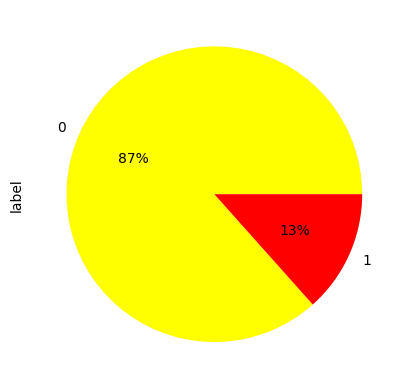

In [ ]:
email_class.label.value_counts().plot(kind='pie', 
                                       autopct='%1.0f%%', 
                                       colors=["Yellow","red"])

**Visualizing Ham and Spam**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

Negatives=email_class[(email_class['label']==1)]
N_words = ' '.join(Negatives['message'])
N_words

'free entry wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send 150 rcv winner as valued network customer selected receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had mobile 11 months more entitled update latest colour mobiles camera free call the mobile update co free 08002986030 six chances win cash from 100 20000 pounds txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl info urgent you 1 week free membership 100000 prize jackpot txt word claim no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub to use credit click wap link next txt message click here httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia dont miss goalsteam news txt national team 87077 eg england 87077 trywales scotland 4txtú120 poboxox36504w45wq 16 thanks subscription ringtone uk mobi

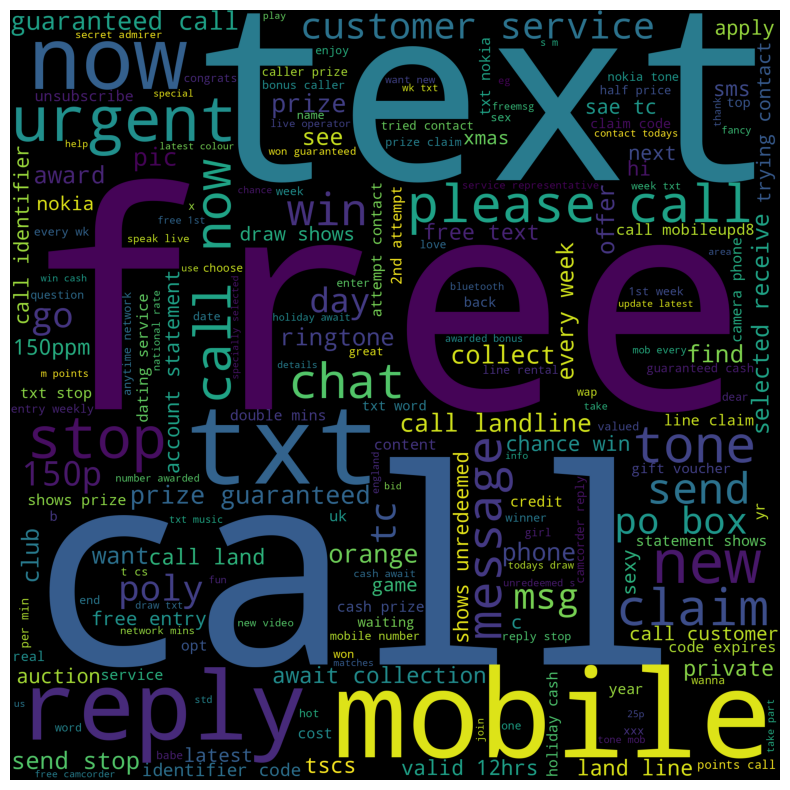

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(N_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Email Sentiments**

In [ ]:
email_sentiments = email_class[['message','label']]

In [ ]:
X = email_sentiments.message
y = email_sentiments.label

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                random_state=0)

**Document Term Matrix -DTM**

In [ ]:
vector = CountVectorizer(stop_words='english',min_df=3)

In [ ]:
vector.fit(Xtrain)
vector.vocabulary_

{'going': 767,
 'need': 1199,
 'little': 1026,
 'experience': 646,
 'understand': 1832,
 'american': 186,
 'customer': 498,
 'voice': 1872,
 'secret': 1513,
 'admirer': 155,
 'thinks': 1745,
 'special': 1620,
 'opt': 1253,
 'reply': 1441,
 'stop': 1651,
 '150': 35,
 'msg': 1178,
 'recd': 1416,
 'cust': 496,
 'care': 366,
 'ok': 1239,
 'huh': 873,
 'park': 1275,
 'ah': 167,
 'got': 776,
 'best': 276,
 'choice': 409,
 'den': 535,
 'juz': 954,
 'just': 953,
 'wasnt': 1897,
 'pissed': 1308,
 'remember': 1434,
 'gone': 769,
 'text': 1727,
 'word': 1961,
 'mobile': 1148,
 'phone': 1293,
 'send': 1523,
 'wats': 1903,
 'da': 503,
 'model': 1154,
 'num': 1227,
 'sorry': 1612,
 'ill': 891,
 'later': 989,
 'worries': 1969,
 'hope': 855,
 'photo': 1295,
 'shoot': 1548,
 'went': 1924,
 'fun': 731,
 'checking': 399,
 'iq': 919,
 'nokia': 1216,
 'tone': 1779,
 'mob': 1147,
 'week': 1915,
 'txt': 1816,
 '87021': 120,
 '1st': 45,
 'free': 711,
 'txtin': 1818,
 'tell': 1718,
 'friends': 720,
 '150ptone'

In [ ]:
vector.get_feature_names_out()

array(['020603', '0800', '08000839402', ..., 'yummy', 'yup', 'zed'],
      dtype=object)

In [ ]:
# transform the words into Document Term Matrix -DTM
DTM_train = vector.transform(Xtrain)
DTM_test = vector.transform(Xtest)

**Email Classification Models**

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [ ]:
from sklearn import metrics
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9842067480258435
[[1208    0]
 [  22  163]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       1.00      0.88      0.94       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



**KNN Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn =KNeighborsClassifier()
knn.fit(DTM_train, ytrain)

KNeighborsClassifier()

In [ ]:
ytest_predict = knn.predict(DTM_test)
model_score =knn.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9203158650394831
[[1207    1]
 [ 110   75]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1208
           1       0.99      0.41      0.57       185

    accuracy                           0.92      1393
   macro avg       0.95      0.70      0.77      1393
weighted avg       0.93      0.92      0.91      1393



**TFIDF VECTORIZER**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer (max_features=2000, min_df=3, max_df=0.85)


In [ ]:
vectorizer.fit(Xtrain)

TfidfVectorizer(max_df=0.85, max_features=2000, min_df=3)

In [ ]:
# transform the words into TFIDF
TFIDF_train = vectorizer.transform(Xtrain)
TFIDF_test = vectorizer.transform(Xtest)

In [ ]:
TFIDF_train

<4179x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 30815 stored elements in Compressed Sparse Row format>

In [ ]:
TFIDF_train.shape

(4179, 2000)

**Random Forest**

In [ ]:
RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(TFIDF_train, ytrain)


RandomForestClassifier(n_estimators=150, random_state=0)

In [ ]:
ytest_predict = RF_model.predict(TFIDF_test)
model_score =RF_model.score(TFIDF_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9827709978463748
[[1208    0]
 [  24  161]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       1.00      0.87      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



**Support Vector Machines- SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(random_state=0)
svc_model.fit(TFIDF_train, ytrain)

SVC(random_state=0)

In [ ]:
ytest_predict = svc_model.predict(TFIDF_test)
model_score =svc_model.score(TFIDF_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9863603732950467
[[1208    0]
 [  19  166]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       1.00      0.90      0.95       185

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393

